# -----------------Life Insurance Case Study Predict the Insurance Cost-----------------
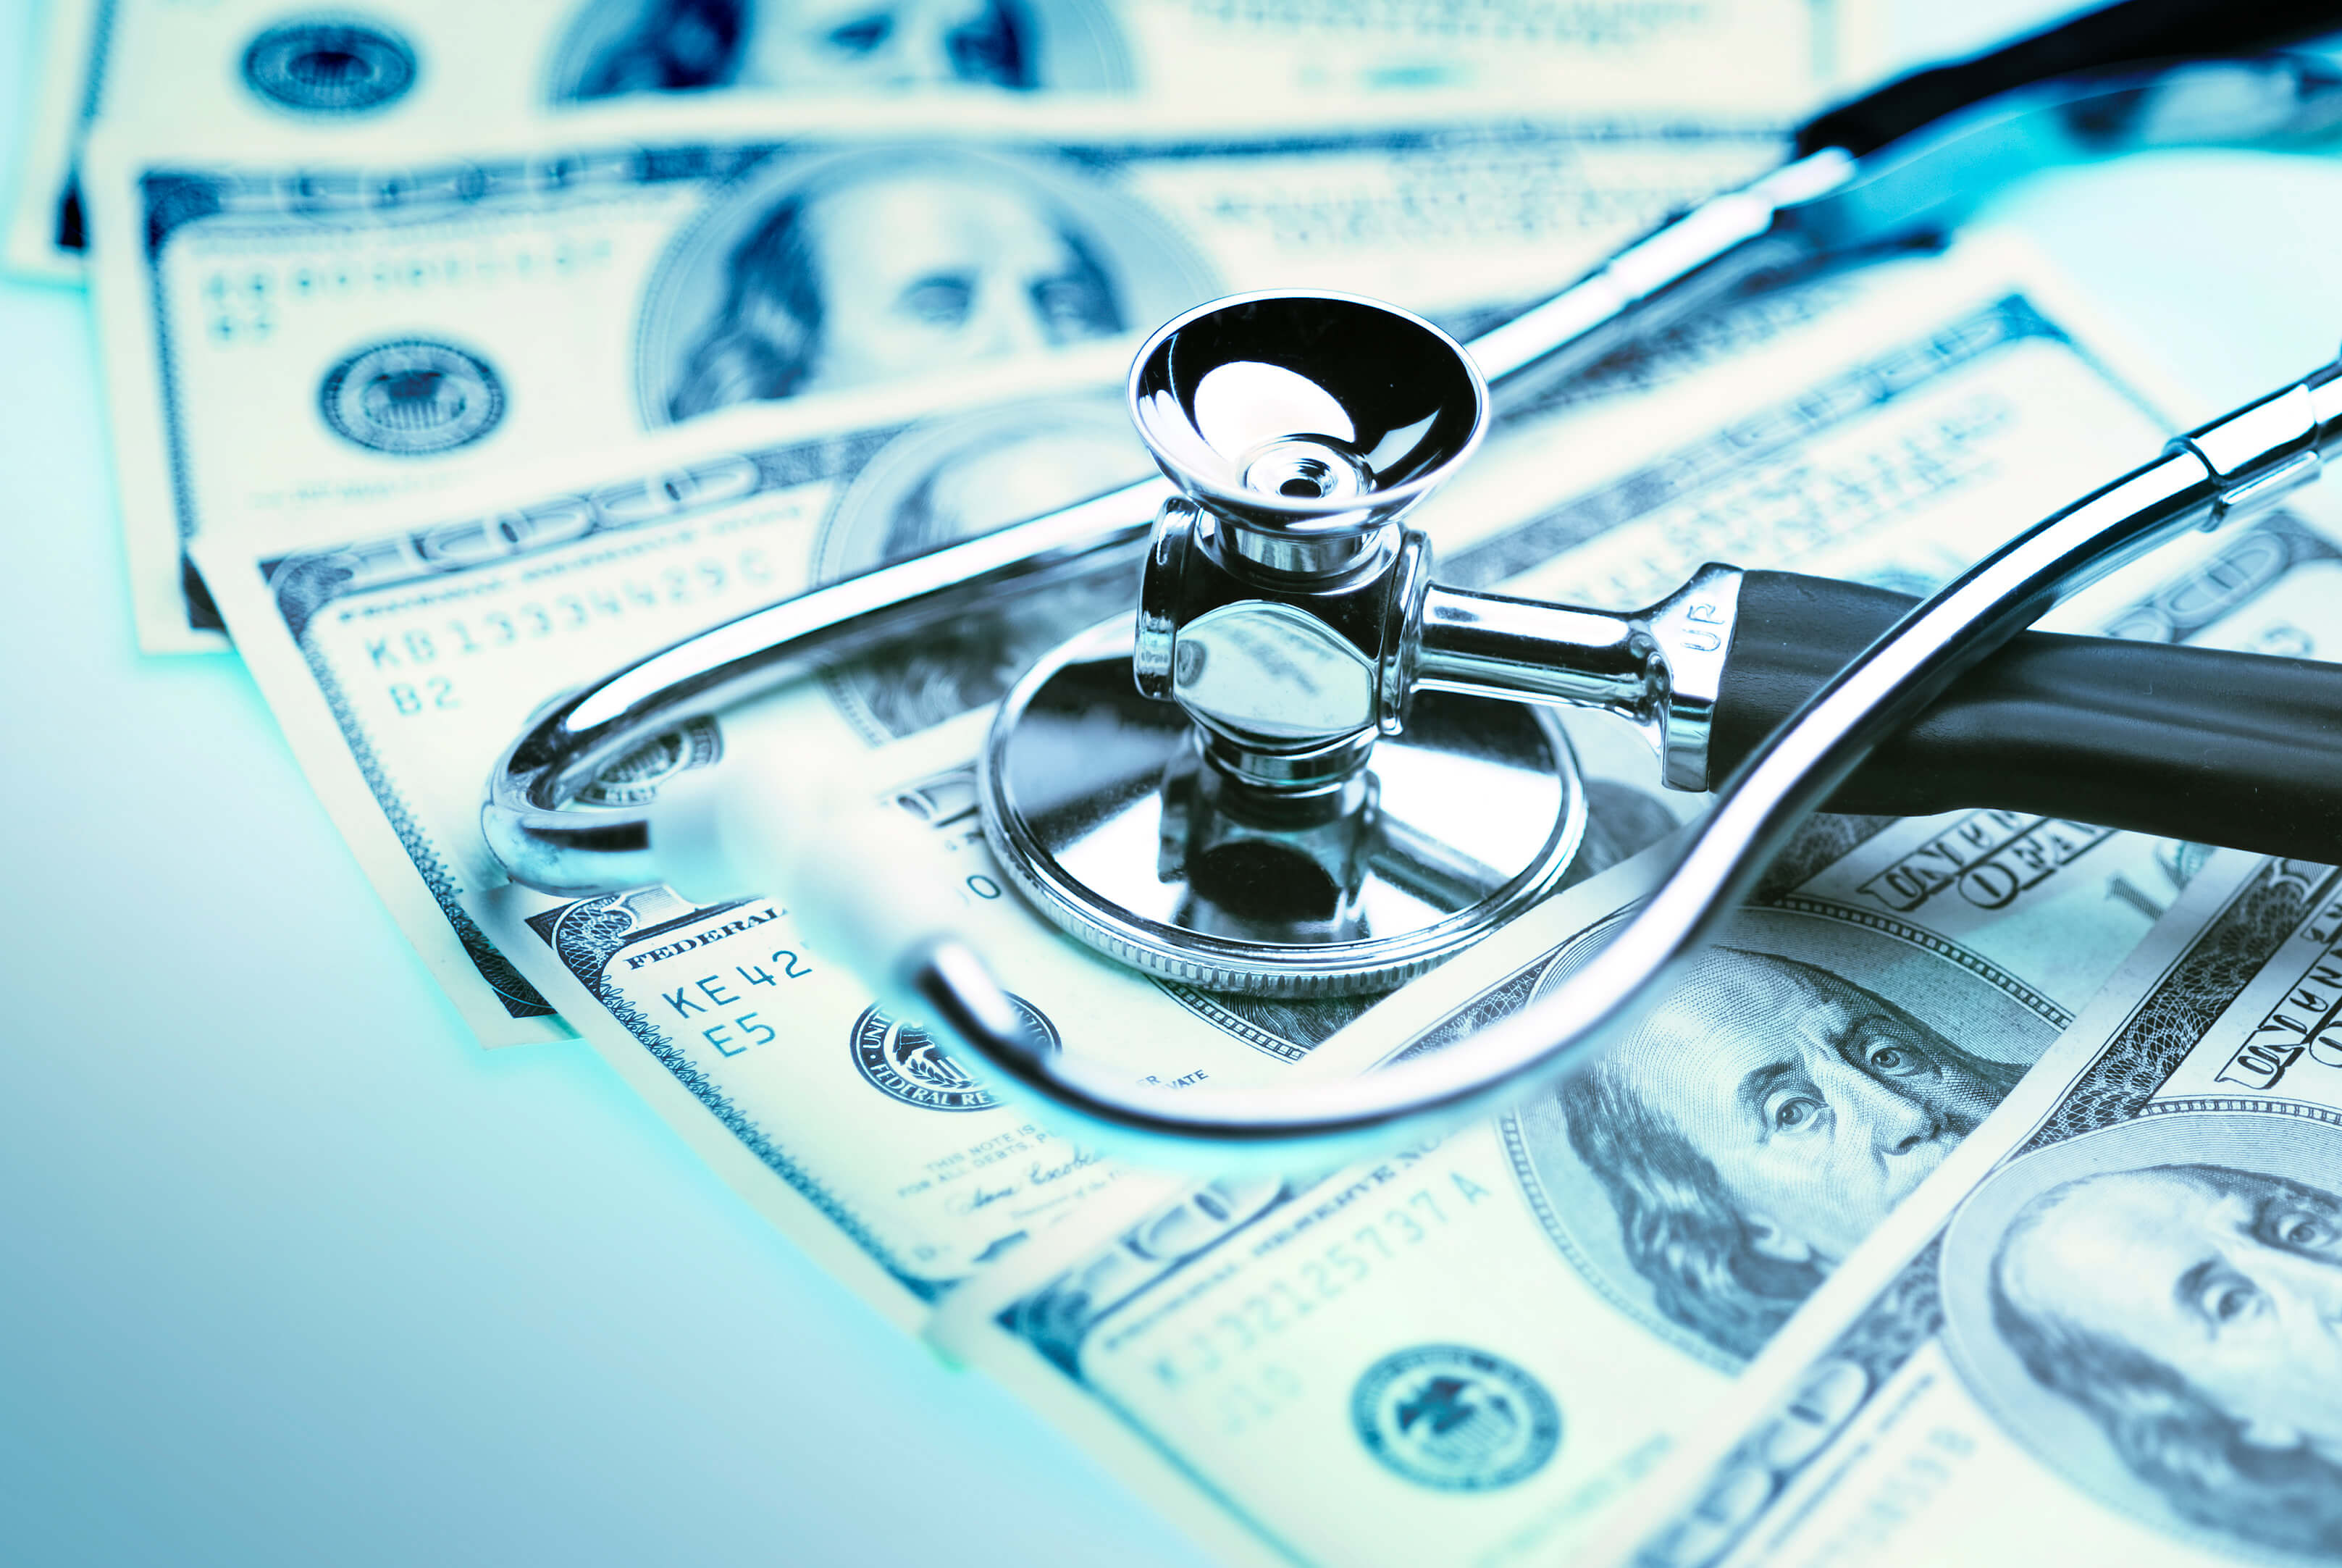

##### Description
- Context
  Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can    tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.
  
 <br>

- Medical expenses are any costs incurred in the prevention or treatment of injury or disease. Medical expenses include health and dental insurance premiums, doctor and hospital visits, co-pays, prescription and over-the-counter drugs, glasses and contacts, crutches, and wheelchairs, to name a few. Medical expenses that are not reimbursed are deductible within certain limits.


##### Importing Necessary Library

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import sys

##### Importing data 
- Link dataset: https://www.kaggle.com/mirichoi0218/insurance

In [2]:
df = pd.read_csv(r"insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# data profiling provide some basic EDA about data
profile = pp.ProfileReport(df)
profile.to_file(r"Insurance.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Data cleaning

In [5]:
# missing value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# check for duplicates data 
count = len(df[df.duplicated()])
print("Duplicate records:",count)
print("Record :")
print(df[df.duplicated()])

Duplicate records: 1
Record :
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [7]:
df.drop_duplicates(inplace=True)
count = len(df[df.duplicated()])
print("Duplicate records:",count)

Duplicate records: 0


In [8]:
df.shape

(1337, 7)

In [9]:
# lets check the data stats
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# datatype of each columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
# convert the categorical into dummy as all the categorical do not have any sequence
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
# rename the required columns
df.rename(columns={"age":"Age","sex":"Gender","bmi":"Body_mass_index","smoker":"Smoker","region":"Region",
                   "charges":"insurance_cost"},
         inplace=True)

In [13]:
df.columns

Index(['Age', 'Gender', 'Body_mass_index', 'children', 'Smoker', 'Region',
       'insurance_cost'],
      dtype='object')

In [14]:
# convert data into dummies variable
Gen = pd.get_dummies(df["Gender"])
Gen.pop("female")
df["Gender"] = Gen["male"]
df.head()

,Age,Gender,Body_mass_index,children,Smoker,Region,insurance_cost
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [15]:
Smo = pd.get_dummies(df["Smoker"])
Smo.pop("no")
df["Smoker"] = Smo["yes"]
df.head()

,Age,Gender,Body_mass_index,children,Smoker,Region,insurance_cost
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [16]:
Reg = pd.get_dummies(df["Region"])
Reg.pop("southwest")
# we have more than one columns concat with the original dataframe
df = pd.concat([df,Reg],axis=1)
df.head()

,Age,Gender,Body_mass_index,children,Smoker,Region,insurance_cost,northeast,northwest,southeast
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0


In [17]:
# removing columns which are converted to dummies and text
df = df.drop(["Region"],axis=1)
df.head()

,Age,Gender,Body_mass_index,children,Smoker,insurance_cost,northeast,northwest,southeast
0,19,0,27.900,0,1,16884.92400,0,0,0
1,18,1,33.770,1,0,1725.55230,0,0,1
2,28,1,33.000,3,0,4449.46200,0,0,1
3,33,1,22.705,0,0,21984.47061,0,1,0
4,32,1,28.880,0,0,3866.85520,0,1,0


#### Treating Outlier In Independent Colunmns

In [20]:
# AGE
sns.boxplot(df["Age"])

In [21]:
# Body_mass_index
sns.boxplot(df["Body_mass_index"])

In [22]:
df = df[['Age', 'Gender', 'Body_mass_index', 'children', 'Smoker', 'northeast', 'northwest', 'southeast','insurance_cost']]

#### Process 1 to select the best feature using Forward Backward proceess

In [23]:
import statsmodels.formula.api as smf
## Initalise the model and then fit the model
model = smf.ols('insurance_cost~Age+Gender+Body_mass_index+children+Smoker+northeast+northwest+southeast' ,data=df).fit()

In [24]:
print(model.summary2())

                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.749     
Dependent Variable:     insurance_cost      AIC:                   27094.2154
Date:                   2021-11-20 09:51    BIC:                   27140.9991
No. Observations:       1337                Log-Likelihood:        -13538.   
Df Model:               8                   F-statistic:           500.0     
Df Residuals:           1328                Prob (F-statistic):    0.00      
R-squared:              0.751               Scale:                 3.6776e+07
-----------------------------------------------------------------------------
                   Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------------
Intercept       -12896.6389 1021.3813 -12.6267 0.0000 -14900.3356 -10892.9422
Age                256.7646   11.9122  21.5547 0.0000    233.3958    280.1334
Gender   

In [25]:
# Eliminating Columns based on Pvalue(stats methods)
import statsmodels.formula.api as smf
## Initalise the model and then fit the model
model = smf.ols('insurance_cost~Age+Gender+Body_mass_index+Smoker+northeast+northwest+southeast' ,data=df).fit()
print(model.summary2())

                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.747     
Dependent Variable:     insurance_cost      AIC:                   27104.0991
Date:                   2021-11-20 09:51    BIC:                   27145.6846
No. Observations:       1337                Log-Likelihood:        -13544.   
Df Model:               7                   F-statistic:           565.1     
Df Residuals:           1329                Prob (F-statistic):    0.00      
R-squared:              0.749               Scale:                 3.7076e+07
-----------------------------------------------------------------------------
                   Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------------
Intercept       -12471.4716 1018.0228 -12.2507 0.0000 -14468.5785 -10474.3647
Age                258.4046   11.9512  21.6216 0.0000    234.9593    281.8498
Gender   

In [26]:
# Eliminating Columns based on Pvalue(stats methods)
import statsmodels.formula.api as smf
## Initalise the model and then fit the model
model = smf.ols('insurance_cost~Age+Gender+Body_mass_index+Smoker+northeast+northwest' ,data=df).fit()
print(model.summary2())

                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.747     
Dependent Variable:     insurance_cost      AIC:                   27102.1673
Date:                   2021-11-20 09:51    BIC:                   27138.5546
No. Observations:       1337                Log-Likelihood:        -13544.   
Df Model:               6                   F-statistic:           659.7     
Df Residuals:           1330                Prob (F-statistic):    0.00      
R-squared:              0.749               Scale:                 3.7050e+07
-----------------------------------------------------------------------------
                   Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------------
Intercept       -12498.1099 1012.5085 -12.3437 0.0000 -14484.3978 -10511.8221
Age                258.5014   11.9412  21.6478 0.0000    235.0757    281.9271
Gender   

In [27]:
# Eliminating Columns based on Pvalue(stats methods)
import statsmodels.formula.api as smf
## Initalise the model and then fit the model
model = smf.ols('insurance_cost~Age+Gender+Body_mass_index+Smoker+southeast' ,data=df).fit()
print(model.summary2())

                      Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.747     
Dependent Variable:     insurance_cost     AIC:                  27103.9083
Date:                   2021-11-20 09:51   BIC:                  27135.0974
No. Observations:       1337               Log-Likelihood:       -13546.   
Df Model:               5                  F-statistic:          789.3     
Df Residuals:           1331               Prob (F-statistic):   0.00      
R-squared:              0.748              Scale:                3.7126e+07
---------------------------------------------------------------------------
                   Coef.    Std.Err.    t     P>|t|     [0.025     0.975]  
---------------------------------------------------------------------------
Intercept       -11817.6414 954.7096 -12.3783 0.0000 -13690.5410 -9944.7418
Age                258.5496  11.9590  21.6197 0.0000    235.0891   282.0102
Gender            -107.4581 334.72

In [28]:
import statsmodels.formula.api as smf
## Initalise the model and then fit the model
model = smf.ols('insurance_cost~Age+Gender+Body_mass_index+Smoker' ,data=df).fit()
print(model.summary2())

                      Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.747     
Dependent Variable:     insurance_cost     AIC:                  27104.4092
Date:                   2021-11-20 09:51   BIC:                  27130.4002
No. Observations:       1337               Log-Likelihood:       -13547.   
Df Model:               4                  F-statistic:          984.9     
Df Residuals:           1332               Prob (F-statistic):   0.00      
R-squared:              0.747              Scale:                3.7168e+07
---------------------------------------------------------------------------
                   Coef.    Std.Err.    t     P>|t|     [0.025     0.975]  
---------------------------------------------------------------------------
Intercept       -11629.3960 947.7635 -12.2704 0.0000 -13488.6678 -9770.1242
Age                259.3429  11.9551  21.6930 0.0000    235.8900   282.7959
Gender            -106.8927 334.90

In [29]:
import statsmodels.formula.api as smf
## Initalise the model and then fit the model
model = smf.ols('insurance_cost~Age+Gender+Smoker' ,data=df).fit()
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.721     
Dependent Variable: insurance_cost   AIC:                27233.8695
Date:               2021-11-20 09:51 BIC:                27254.6622
No. Observations:   1337             Log-Likelihood:     -13613.   
Df Model:           3                F-statistic:        1150.     
Df Residuals:       1333             Prob (F-statistic): 0.00      
R-squared:          0.721            Scale:              4.0977e+07
-------------------------------------------------------------------
             Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept  -2429.5887 558.8421 -4.3475 0.0000 -3525.8945 -1333.2829
Age          274.8321  12.4761 22.0287 0.0000   250.3573   299.3070
Gender        83.6854 351.2388  0.2383 0.8117  -605.3556   772.7263
Smoker     23846.2098 435.1093 54.8051 0.0000 22992.6362 24699.783

In [30]:
# Finally we arrive with 3 important column 

###### Check mulitcollinarity in all columns of the dataframe

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = df[['Age', 'Gender', 'Body_mass_index', 'children', 'Smoker', 'northeast',
       'northwest', 'southeast']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
print(vif_data)


           feature        VIF
0              Age   7.798172
1           Gender   2.005111
2  Body_mass_index  10.720255
3         children   1.807240
4           Smoker   1.264615
5        northeast   1.829877
6        northwest   1.829200
7        southeast   2.170552


In [32]:
# provide that VIF > 10 unimportant and causing multicollinearity

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = df[['Age', 'Gender', 'children', 'Smoker', 'northeast',
       'northwest', 'southeast']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
print(vif_data)

     feature       VIF
0        Age  3.863253
1     Gender  1.885502
2   children  1.747961
3     Smoker  1.256094
4  northeast  1.696465
5  northwest  1.696783
6  southeast  1.792420


In [34]:
# lest again test the Backward forward to find the columns 
df2 = df[['Age', 'Gender', 'children', 'Smoker', 'northeast',
       'northwest', 'southeast',"insurance_cost"]]
import statsmodels.formula.api as smf
## Initalise the model and then fit the model
model = smf.ols('insurance_cost~Age+Gender+children+Smoker+northeast+northwest+southeast' ,data=df2).fit()
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.723     
Dependent Variable: insurance_cost   AIC:                27226.7596
Date:               2021-11-20 09:51 BIC:                27268.3450
No. Observations:   1337             Log-Likelihood:     -13605.   
Df Model:           7                F-statistic:        498.9     
Df Residuals:       1329             Prob (F-statistic): 0.00      
R-squared:          0.724            Scale:              4.0638e+07
-------------------------------------------------------------------
             Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept  -3272.8153 651.7970 -5.0212 0.0000 -4551.4785 -1994.1521
Age          273.2969  12.4361 21.9760 0.0000   248.9003   297.6935
Gender        54.5494 349.8770  0.1559 0.8761  -631.8220   740.9209
children     496.1957 144.9459  3.4233 0.0006   211.8480   780.543

In [35]:
import statsmodels.formula.api as smf
## Initalise the model and then fit the model
model = smf.ols('insurance_cost~Age+Gender+Smoker+northeast+northwest+southeast' ,data=df2).fit()
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.721     
Dependent Variable: insurance_cost   AIC:                27236.4975
Date:               2021-11-20 09:51 BIC:                27272.8848
No. Observations:   1337             Log-Likelihood:     -13611.   
Df Model:           6                F-statistic:        575.5     
Df Residuals:       1330             Prob (F-statistic): 0.00      
R-squared:          0.722            Scale:              4.0966e+07
-------------------------------------------------------------------
             Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept  -2790.2455 638.9303 -4.3671 0.0000 -4043.6665 -1536.8245
Age          275.0766  12.4752 22.0498 0.0000   250.6033   299.5499
Gender        76.7082 351.2240  0.2184 0.8271  -612.3052   765.7215
Smoker     23789.2062 436.1946 54.5381 0.0000 22933.5018 24644.910

In [36]:
import statsmodels.formula.api as smf
## Initalise the model and then fit the model
model = smf.ols('insurance_cost~Age+Gender+Smoker+northwest+southeast' ,data=df2).fit()
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.721     
Dependent Variable: insurance_cost   AIC:                27235.2565
Date:               2021-11-20 09:51 BIC:                27266.4456
No. Observations:   1337             Log-Likelihood:     -13612.   
Df Model:           5                F-statistic:        690.6     
Df Residuals:       1331             Prob (F-statistic): 0.00      
R-squared:          0.722            Scale:              4.0958e+07
-------------------------------------------------------------------
             Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept  -2572.0991 587.5022 -4.3780 0.0000 -3724.6302 -1419.5679
Age          275.0327  12.4740 22.0485 0.0000   250.5619   299.5035
Gender        76.4500 351.1915  0.2177 0.8277  -612.4993   765.3992
Smoker     23798.4536 436.0247 54.5805 0.0000 22943.0830 24653.824

In [37]:
import statsmodels.formula.api as smf
## Initalise the model and then fit the model
model = smf.ols('insurance_cost~Age+Gender+Smoker+northwest' ,data=df2).fit()
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.720     
Dependent Variable: insurance_cost   AIC:                27235.3650
Date:               2021-11-20 09:51 BIC:                27261.3559
No. Observations:   1337             Log-Likelihood:     -13613.   
Df Model:           4                F-statistic:        862.0     
Df Residuals:       1332             Prob (F-statistic): 0.00      
R-squared:          0.721            Scale:              4.0992e+07
-------------------------------------------------------------------
             Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept  -2355.9960 568.5017 -4.1442 0.0000 -3471.2523 -1240.7396
Age          274.8356  12.4784 22.0249 0.0000   250.3561   299.3150
Gender        81.2627 351.3209  0.2313 0.8171  -607.9399   770.4653
Smoker     23835.2637 435.4642 54.7353 0.0000 22980.9932 24689.534

In [38]:
import statsmodels.formula.api as smf
## Initalise the model and then fit the model
model = smf.ols('insurance_cost~Age+Gender+Smoker' ,data=df2).fit()
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.721     
Dependent Variable: insurance_cost   AIC:                27233.8695
Date:               2021-11-20 09:51 BIC:                27254.6622
No. Observations:   1337             Log-Likelihood:     -13613.   
Df Model:           3                F-statistic:        1150.     
Df Residuals:       1333             Prob (F-statistic): 0.00      
R-squared:          0.721            Scale:              4.0977e+07
-------------------------------------------------------------------
             Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept  -2429.5887 558.8421 -4.3475 0.0000 -3525.8945 -1333.2829
Age          274.8321  12.4761 22.0287 0.0000   250.3573   299.3070
Gender        83.6854 351.2388  0.2383 0.8117  -605.3556   772.7263
Smoker     23846.2098 435.1093 54.8051 0.0000 22992.6362 24699.783

In [39]:
# Achieve the same columns
df.head()

,Age,Gender,Body_mass_index,children,Smoker,northeast,northwest,southeast,insurance_cost
0,19,0,27.900,0,1,0,0,0,16884.92400
1,18,1,33.770,1,0,0,0,1,1725.55230
2,28,1,33.000,3,0,0,0,1,4449.46200
3,33,1,22.705,0,0,0,1,0,21984.47061
4,32,1,28.880,0,0,0,1,0,3866.85520


###### F Regression (Univaraite Regression)

In [40]:
from sklearn.feature_selection import f_regression
features = df.drop(["insurance_cost"],axis=1)
target = df["insurance_cost"]
F_values, p_values  = f_regression(features, target )

In [41]:
F_values = pd.Series(F_values)
p_values = pd.Series(p_values)
cols = pd.Series(features.columns)

In [42]:
f_reg_res = pd.concat([cols,F_values,p_values],axis=1)

In [43]:
f_reg_res.columns = ['cols','F_values','p_values']

In [44]:
f_reg_res

,cols,F_values,p_values
0,Age,130.402971,6.975749e-29
1,Gender,4.513038,3.382079e-02
2,Body_mass_index,54.702715,2.468040e-13
3,children,6.090326,1.371703e-02
4,Smoker,2175.736863,1.406722e-282
5,northeast,0.047190,8.280607e-01
6,northwest,2.001859,1.573396e-01
7,southeast,7.266644,7.112934e-03


In [45]:
# from the above data we can filter the columns

In [46]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
X = df.drop(["insurance_cost"],axis=1)
y = df["insurance_cost"]
model.fit(X, y)
# get importance
importance = model.coef_
print(importance)

[  256.76461078  -129.48147837   339.2503637    474.8204855
 23847.32884379   960.08138547   610.85485391   -75.18421629]


In [47]:
res_df = pd.DataFrame({"Columns":[i for i in X.columns],
                      "Importane":importance}).reset_index()
res_df

,index,Columns,Importane
0,0,Age,256.764611
1,1,Gender,-129.481478
2,2,Body_mass_index,339.250364
3,3,children,474.820486
4,4,Smoker,23847.328844
5,5,northeast,960.081385
6,6,northwest,610.854854
7,7,southeast,-75.184216


In [48]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 256.76461
Feature: 1, Score: -129.48148
Feature: 2, Score: 339.25036
Feature: 3, Score: 474.82049
Feature: 4, Score: 23847.32884
Feature: 5, Score: 960.08139
Feature: 6, Score: 610.85485
Feature: 7, Score: -75.18422


<ipython-input-48-f943382d21ab>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pyplot.show()


In [49]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
res_df = pd.DataFrame({"Columns":[i for i in X.columns],
                      "Importane":importance}).reset_index()
res_df

In [ ]:
# There will be mulitple algo for feature selection and we can validate them to find best features

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

##### From the above understanding we find that only 3 feature have impact over insurance cost
- Insurance cost ~ Age |  Smoker  | Gender

In [ ]:
# data is not in uniform scale lets normalize data
df = df[['insurance_cost','Age','Smoker','Gender']]
df.head()

In [50]:
df.shape

(1337, 9)

In [51]:
Target = df["insurance_cost"]
feature = df[['Age','Smoker','Gender']]

In [52]:
# Spliting data into train test
from sklearn.model_selection import train_test_split
# keeping a train:test--> 75:25
x_train,x_test,y_train,y_test = train_test_split(feature,Target,random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [54]:
#Model Tranining
model.fit(x_train,y_train)

LinearRegression()

In [55]:
model.coef_
# B1,B2,B3

array([  264.05649006, 22976.04155898,   127.18756414])

In [56]:
model.intercept_
# B0

-1995.644981753294

**Y = -7883.49 + 349.95*Age + 21850.543*Smoker + Gender*6351.386**

In [57]:
# predicting test data
y_pred = model.predict(x_test)

In [58]:
result = pd.DataFrame({"Actual Insurance cost" : y_test,
                      "Predicted Insurance cost" : y_pred})
result = pd.concat([x_test,result],axis=1)
result

,Age,Smoker,Gender,Actual Insurance cost,Predicted Insurance cost
900,49,0,1,8688.85885,11070.310595
1064,29,0,0,5708.86700,5661.993230
1256,51,0,0,11436.73815,11471.236011
298,31,1,1,38746.35510,29293.335333
237,31,0,1,4463.20510,6317.293774
...,...,...,...,...,...
1014,38,0,0,5383.53600,8038.501641
669,40,0,0,6500.23590,8566.614621
1109,45,0,1,8605.36150,10014.084635
788,29,0,1,5209.57885,5789.180794


In [59]:
result["error"] = result["Actual Insurance cost"]- result["Predicted Insurance cost"]

In [60]:
result

,Age,Smoker,Gender,Actual Insurance cost,Predicted Insurance cost,error
900,49,0,1,8688.85885,11070.310595,-2381.451745
1064,29,0,0,5708.86700,5661.993230,46.873770
1256,51,0,0,11436.73815,11471.236011,-34.497861
298,31,1,1,38746.35510,29293.335333,9453.019767
237,31,0,1,4463.20510,6317.293774,-1854.088674
...,...,...,...,...,...,...
1014,38,0,0,5383.53600,8038.501641,-2654.965641
669,40,0,0,6500.23590,8566.614621,-2066.378721
1109,45,0,1,8605.36150,10014.084635,-1408.723135
788,29,0,1,5209.57885,5789.180794,-579.601944


In [61]:
from sklearn.metrics import r2_score
print("R_sqaure value is :", r2_score(y_test,y_pred))

R_sqaure value is : 0.7633672546297284


In [62]:
# error term can be calculated by MSE
from sklearn.metrics import mean_squared_error
print("MSE is :",mean_squared_error(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

MSE is : 40916124.15952779
RMSE is : 6396.571281516981


### Perform DVT to conclude the model

In [63]:
dvt  = df.copy()
dvt.head()

,Age,Gender,Body_mass_index,children,Smoker,northeast,northwest,southeast,insurance_cost
0,19,0,27.900,0,1,0,0,0,16884.92400
1,18,1,33.770,1,0,0,0,1,1725.55230
2,28,1,33.000,3,0,0,0,1,4449.46200
3,33,1,22.705,0,0,0,1,0,21984.47061
4,32,1,28.880,0,0,0,1,0,3866.85520


In [64]:
print("Training set: ",round(dvt.shape[0]*.70))
print("Testing set: ",round(dvt.shape[0]*.10))
print("Validation set: ",round(dvt.shape[0]*.20))

Training set:  936
Testing set:  134
Validation set:  267


In [65]:
train = df.iloc[0:936,0:]
test = df.iloc[937:(936+134),0:]
val = df.iloc[(936+134):,0:]

In [66]:
x_train =train[["Age","Smoker","Gender"]]
y_train =train["insurance_cost"]

In [67]:
x_test =test[["Age","Smoker","Gender"]]
y_test =test["insurance_cost"]

In [68]:
x_val =val[["Age","Smoker","Gender"]]
y_val =val["insurance_cost"]

In [69]:
# ML
# create a model--> Regression --> linear regression
from sklearn.linear_model import LinearRegression
model =LinearRegression()

In [70]:
model.fit(x_train,y_train)

LinearRegression()

In [71]:
# testing 
pred = model.predict(x_test)
pred

array([ 2282.88716011, 11953.91307097,  2282.88716011, 11389.13683166,
        2547.05599887,  2559.20218614, 14440.7483052 , 13047.02698781,
        8914.4477847 , 31527.10765016,  8914.4477847 , 28211.32733787,
       13059.17317507, 35395.51801451,  5862.83631117, 33461.31283234,
       30698.16257209,  5874.98249843, 36224.46309258,  3940.77731626,
       33184.99780631, 10572.33794085,  2823.3710249 ,  5586.52128514,
       14981.23216998, 10019.7078888 , 11677.59804495,  6980.24260253,
       35395.51801451,  9467.07783675,  3111.83223819,  8349.67154539,
       11389.13683166,  6968.09641527,  3652.31610297,  2823.3710249 ,
        4493.40736831, 29316.58744197, 10572.33794085,  4493.40736831,
       10007.56170154,  7520.72646731, 12230.228097  ,  6703.92757651,
       29869.21749402,  5033.89123309,  2835.51721216,  9731.24667551,
        9190.76281073, 10007.56170154,  6703.92757651, 28199.1811506 ,
        4757.57620707,  8073.35651936, 11389.13683166,  7809.18768061,
      

In [72]:
# test the 3 stage of DVT on the model
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
pred_val = model.predict(x_val)

In [73]:
# lets calculate RMSE
from sklearn.metrics import mean_squared_error
RMSE_train = np.sqrt(mean_squared_error(y_train,pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test,pred_test))
RMSE_val = np.sqrt(mean_squared_error(y_val,pred_val))

In [74]:
print(RMSE_train,RMSE_test,RMSE_val)

6246.75266774571 7329.733403256787 6420.1480898521595


In [75]:
bias = np.array([RMSE_train,RMSE_test,RMSE_val]).mean()
var = np.array([RMSE_train,RMSE_test,RMSE_val]).var()
print("Bias is {} & Variance is {}".format(bias,var))

Bias is 6665.544720284885 & Variance is 225584.29869522015


## let use data normalize and again bulit model 3

In [76]:
Target = df["insurance_cost"]
feature = df[['Age','Smoker','Gender']]

In [77]:
# Spliting data into train test
from sklearn.model_selection import train_test_split
# keeping a train:test--> 75:25
x_train,x_test,y_train,y_test = train_test_split(feature,Target,random_state=42)

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [80]:
model.fit(X_train,y_train)

LinearRegression()

In [81]:
y_pred = model.predict(X_test)

In [82]:
model.coef_
# B1,B2,B3

array([3687.19256431, 9268.58800294,   63.55272439])

In [83]:
model.intercept_
# B0

13082.300336067865

In [84]:
result = pd.DataFrame({"Actual Insurance cost" : y_test,
                      "Predicted Insurance cost" : y_pred})
result = pd.concat([x_test,result],axis=1)
result

,Age,Smoker,Gender,Actual Insurance cost,Predicted Insurance cost
900,49,0,1,8688.85885,11070.310595
1064,29,0,0,5708.86700,5661.993230
1256,51,0,0,11436.73815,11471.236011
298,31,1,1,38746.35510,29293.335333
237,31,0,1,4463.20510,6317.293774
...,...,...,...,...,...
1014,38,0,0,5383.53600,8038.501641
669,40,0,0,6500.23590,8566.614621
1109,45,0,1,8605.36150,10014.084635
788,29,0,1,5209.57885,5789.180794


In [85]:
result["Error"] = result["Actual Insurance cost"]- result["Predicted Insurance cost"]

In [86]:
from sklearn.metrics import r2_score
print("R_sqaure value is :", r2_score(result["Actual Insurance cost"],result["Predicted Insurance cost"]))

R_sqaure value is : 0.7633672546297284


In [87]:
# error term can be calculated by MSE
from sklearn.metrics import mean_squared_error
print("MSE is :",mean_squared_error(result["Actual Insurance cost"],result["Predicted Insurance cost"]))
print("RMSE is :",np.sqrt(mean_squared_error(result["Actual Insurance cost"],result["Predicted Insurance cost"])))

MSE is : 40916124.15952778
RMSE is : 6396.57128151698


In [88]:
sns.lmplot(x ="Actual Insurance cost",y="Predicted Insurance cost",data=result)

In [89]:
# Create model treating outliner from Y (insurance cost)
df.head()

,Age,Gender,Body_mass_index,children,Smoker,northeast,northwest,southeast,insurance_cost
0,19,0,27.900,0,1,0,0,0,16884.92400
1,18,1,33.770,1,0,0,0,1,1725.55230
2,28,1,33.000,3,0,0,0,1,4449.46200
3,33,1,22.705,0,0,0,1,0,21984.47061
4,32,1,28.880,0,0,0,1,0,3866.85520


In [90]:
df.describe()

,Age,Gender,Body_mass_index,children,Smoker,northeast,northwest,southeast,insurance_cost
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,0.242334,0.242334,0.272251,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,0.428655,0.428655,0.445285,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,0.000000,0.000000,0.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,0.000000,0.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,0.000000,0.000000,1.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,63770.428010


In [91]:
Q3 = 16657
Q1 = 4746
IQR = Q3-Q1
ul = Q3+(1.5*IQR)

In [92]:
df["insurance_cost"] = np.where(df["insurance_cost"]>ul,ul,df["insurance_cost"])

In [93]:
Target = df["insurance_cost"]
feature = df[['Age','Smoker','Gender']]

In [94]:
# Spliting data into train test
from sklearn.model_selection import train_test_split
# keeping a train:test--> 75:25
x_train,x_test,y_train,y_test = train_test_split(feature,Target,random_state=42)

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [96]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [97]:
model.fit(X_train,y_train)

LinearRegression()

In [98]:
y_pred = model.predict(X_test)

In [99]:
model.coef_
# B1,B2,B3

array([ 3.27873073e+03,  7.92625429e+03, -3.83680363e+00])

In [100]:
model.intercept_
# B0

12401.893526187623

In [101]:
result = pd.DataFrame({"Actual Insurance cost" : y_test,
                      "Predicted Insurance cost" : y_pred})
result = pd.concat([x_test,result],axis=1)
result

,Age,Smoker,Gender,Actual Insurance cost,Predicted Insurance cost
900,49,0,1,8688.85885,10714.617516
1064,29,0,0,5708.86700,6026.202159
1256,51,0,0,11436.73815,11191.905473
298,31,1,1,34523.50000,26136.643403
237,31,0,1,4463.20510,6488.132986
...,...,...,...,...,...
1014,38,0,0,5383.53600,8139.444424
669,40,0,0,6500.23590,8609.053816
1109,45,0,1,8605.36150,9775.398732
788,29,0,1,5209.57885,6018.523594


In [102]:
result["Error"] = result["Actual Insurance cost"]- result["Predicted Insurance cost"]

In [103]:
sns.lmplot(x ="Actual Insurance cost",y="Predicted Insurance cost",data=result)

In [104]:
from sklearn.metrics import r2_score
print("R_sqaure value is :", r2_score(result["Actual Insurance cost"],result["Predicted Insurance cost"]))

R_sqaure value is : 0.7824276213878013


In [105]:
# error term can be calculated by MSE
from sklearn.metrics import mean_squared_error
print("MSE is :",mean_squared_error(result["Actual Insurance cost"],result["Predicted Insurance cost"]))
print("RMSE is :",np.sqrt(mean_squared_error(result["Actual Insurance cost"],result["Predicted Insurance cost"])))

MSE is : 24163883.43111325
RMSE is : 4915.677311532283
